# Exploratory Data Analysis Starter

## Import packages

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client = pd.read_csv(r"./client_data.csv")
price  = pd.read_csv(r"./price_data.csv")

Below is the summary discription for the data in both cvs

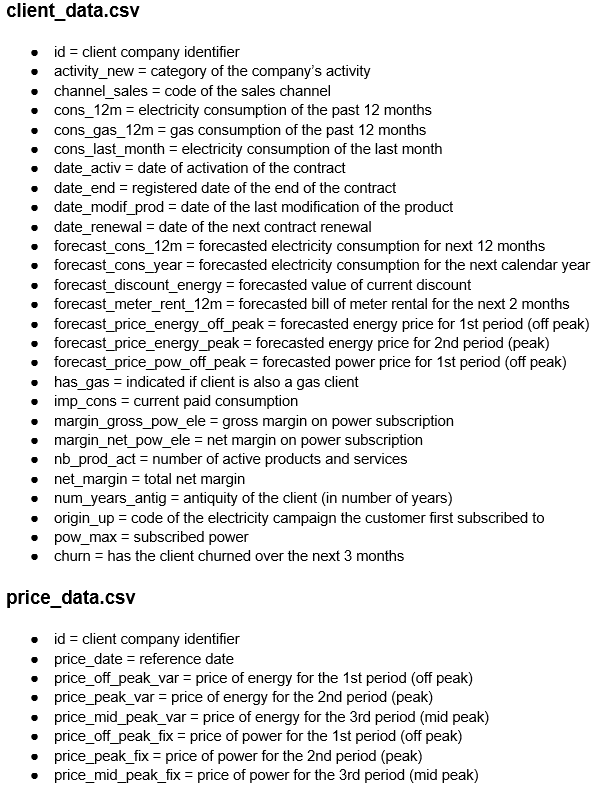

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Data Cleaning

Lets start with finding missing values


In [7]:
entries_c = client.notnull().sum()
total_c = client.isnull().sum().sort_values(ascending = False)
percent_c = (client.isnull().sum().sort_values(ascending = False))/(client.isnull().count().sort_values(ascending = False))*100


missing_data_c = pd.concat([entries_c,total_c, percent_c],  axis =1, keys = ['Entries','Total', 'Percent'])
missing_data_c

,Entries,Total,Percent
id,14606,0,0.0
channel_sales,14606,0,0.0
cons_12m,14606,0,0.0
cons_gas_12m,14606,0,0.0
cons_last_month,14606,0,0.0
date_activ,14606,0,0.0
date_end,14606,0,0.0
date_modif_prod,14606,0,0.0
date_renewal,14606,0,0.0
forecast_cons_12m,14606,0,0.0


In [8]:
entries_p = price.notnull().sum()
total_p = price.isnull().sum().sort_values(ascending = False)
percent_p = (price.isnull().sum().sort_values(ascending = False))/(price.isnull().count().sort_values(ascending = False))*100


missing_data_p = pd.concat([entries_p,total_p, percent_p],  axis =1, keys = ['Entries','Total', 'Percent'])
missing_data_p

,Entries,Total,Percent
id,193002,0,0.0
price_date,193002,0,0.0
price_off_peak_var,193002,0,0.0
price_peak_var,193002,0,0.0
price_mid_peak_var,193002,0,0.0
price_off_peak_fix,193002,0,0.0
price_peak_fix,193002,0,0.0
price_mid_peak_fix,193002,0,0.0


## Univariate Analysis
### Descriptive Statistic Client Dataset

In [9]:
client.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


### Descriptive Statistic Price Dataset

In [10]:
price.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


## Data Visualizations
### Univariate Data Exploration
#### Boxplot Client Dataset

In [11]:
num_client = client.select_dtypes(include='number').columns
num_price = price.select_dtypes(include='number').columns

In [12]:
client[num_client]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,0.00,27.88,27.88,2,381.77,4,15.000,0
14602,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,15.94,0.00,0.00,1,90.34,3,6.000,1
14603,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,18.05,39.84,39.84,1,20.38,4,15.935,1
14604,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0.00,13.08,13.08,1,0.96,3,11.000,0


In [13]:
print(len(num_client))
print(len(num_price))

18
6


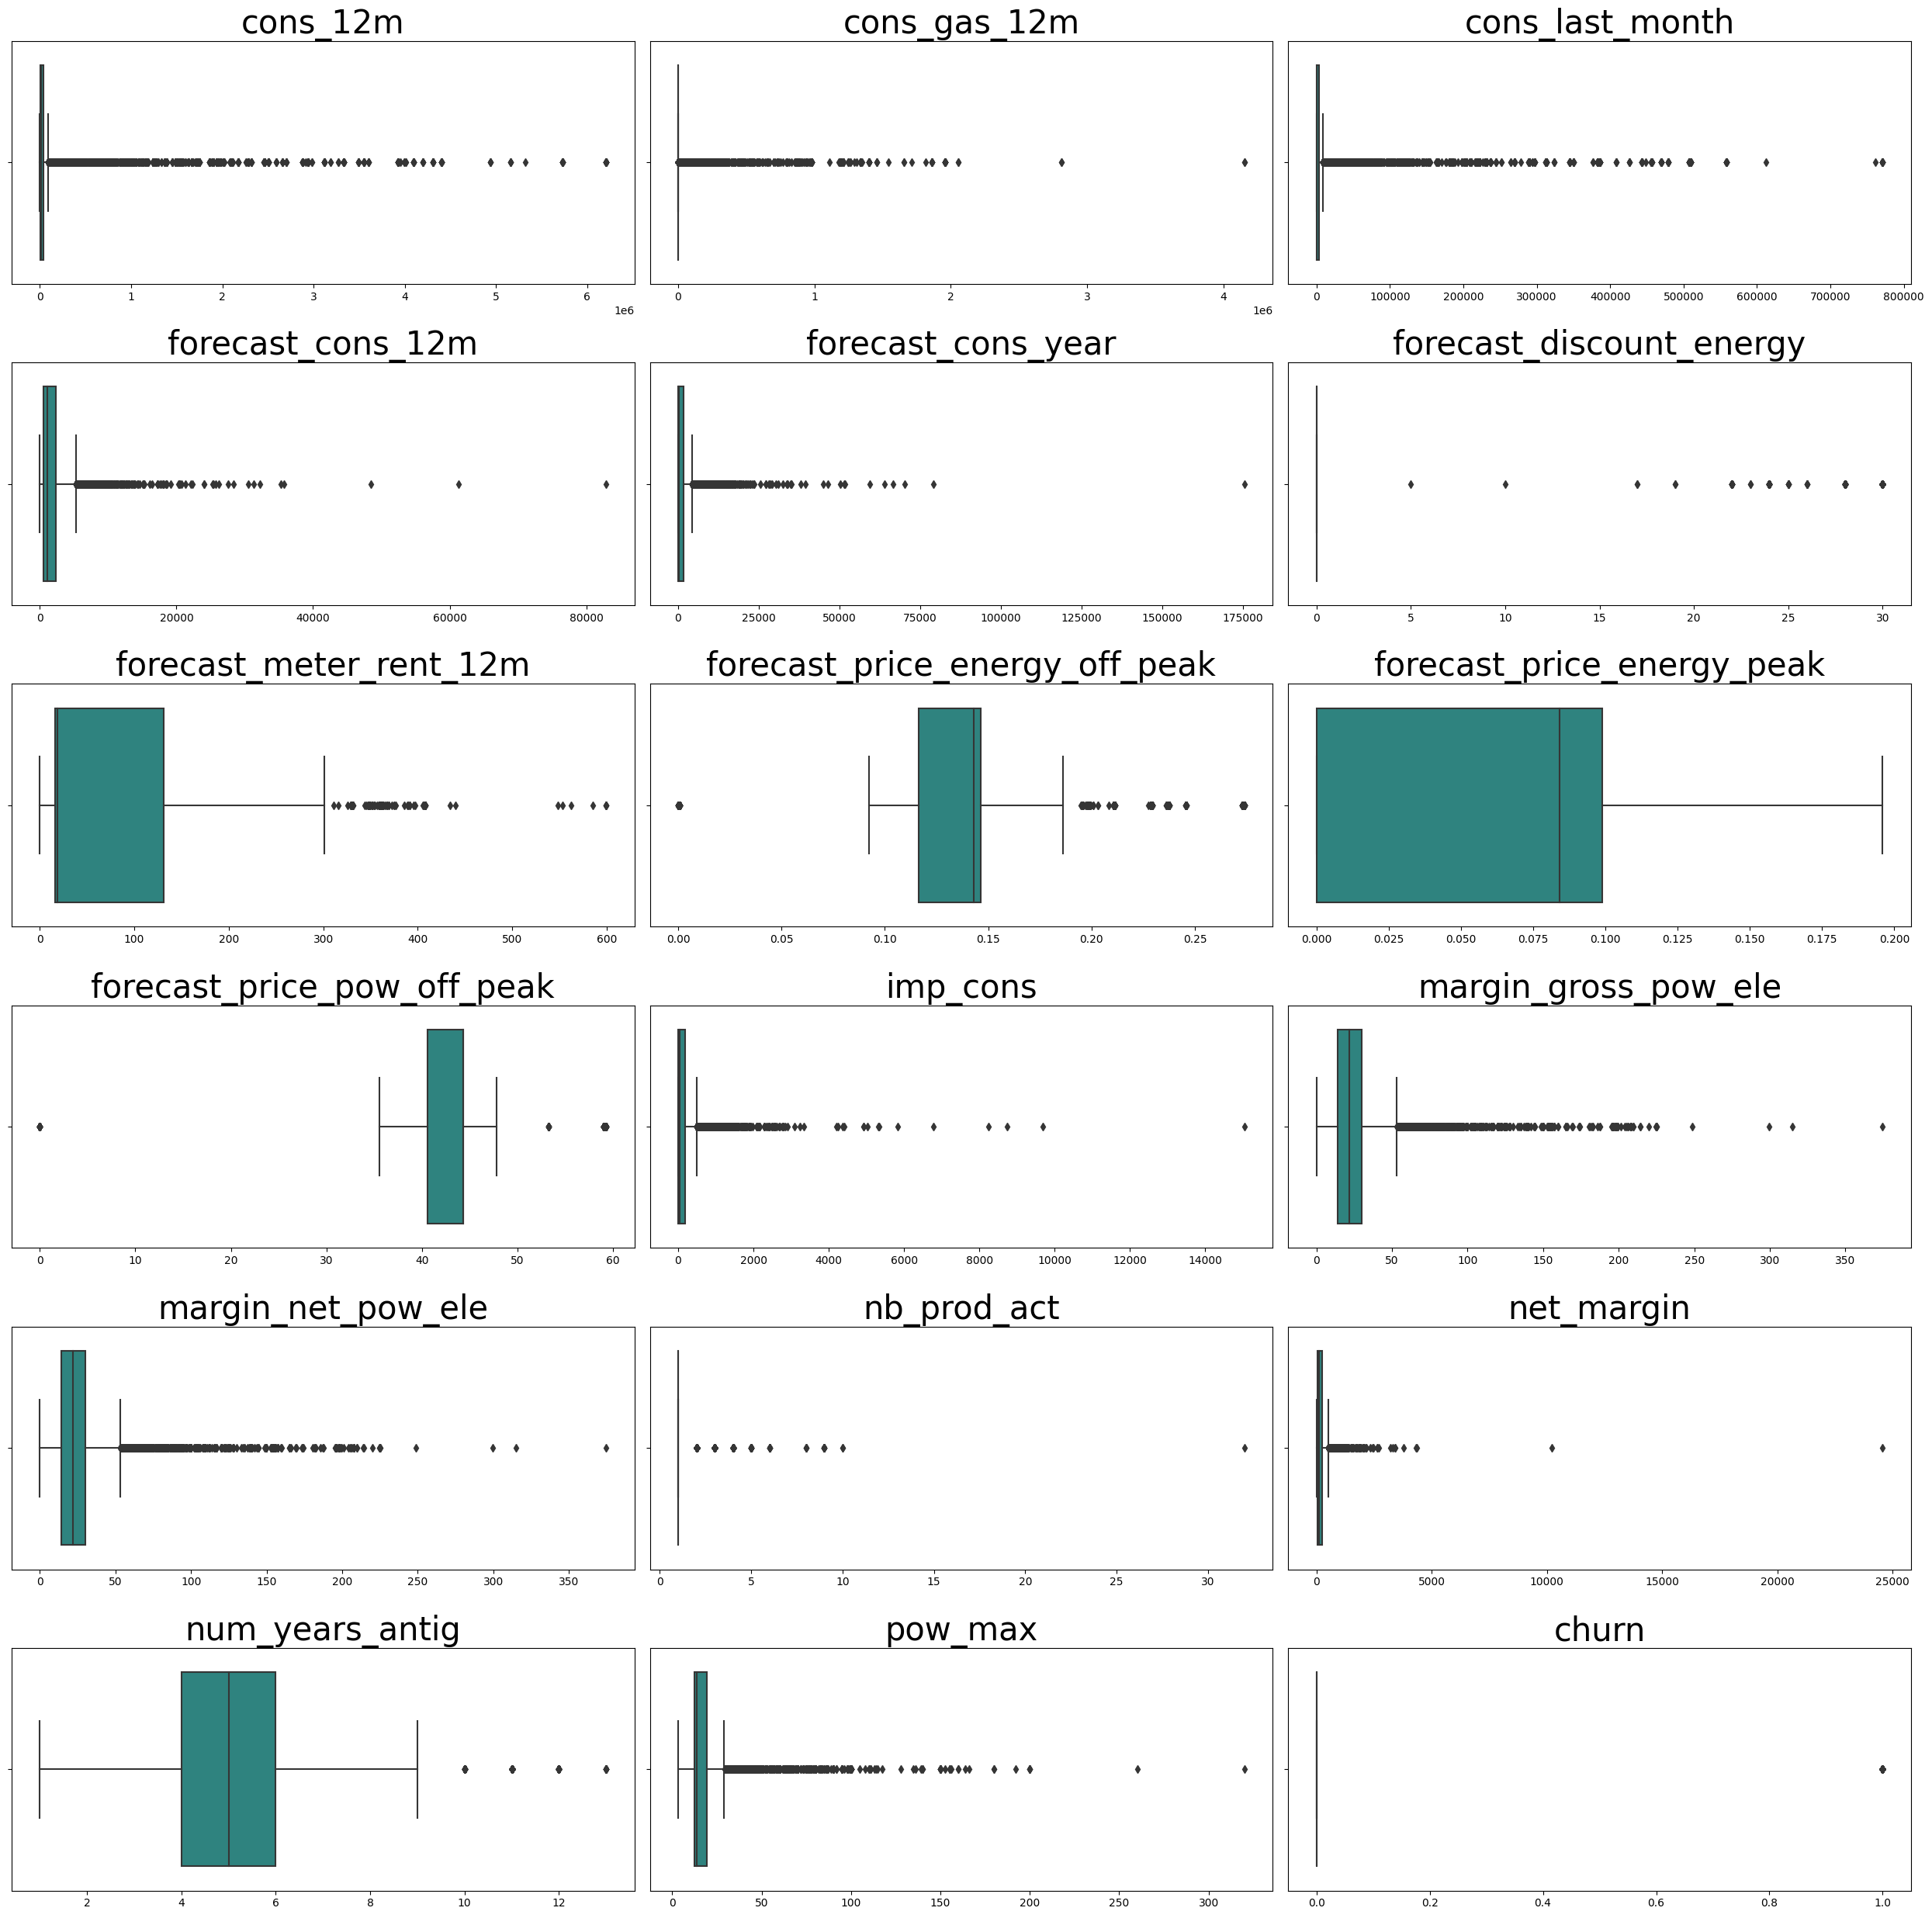

In [14]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.boxplot(x=client[num_client[i]], palette='viridis')
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

#### KDE Plot Client Dataset

In [16]:
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

#### Violinplot Client Dataset

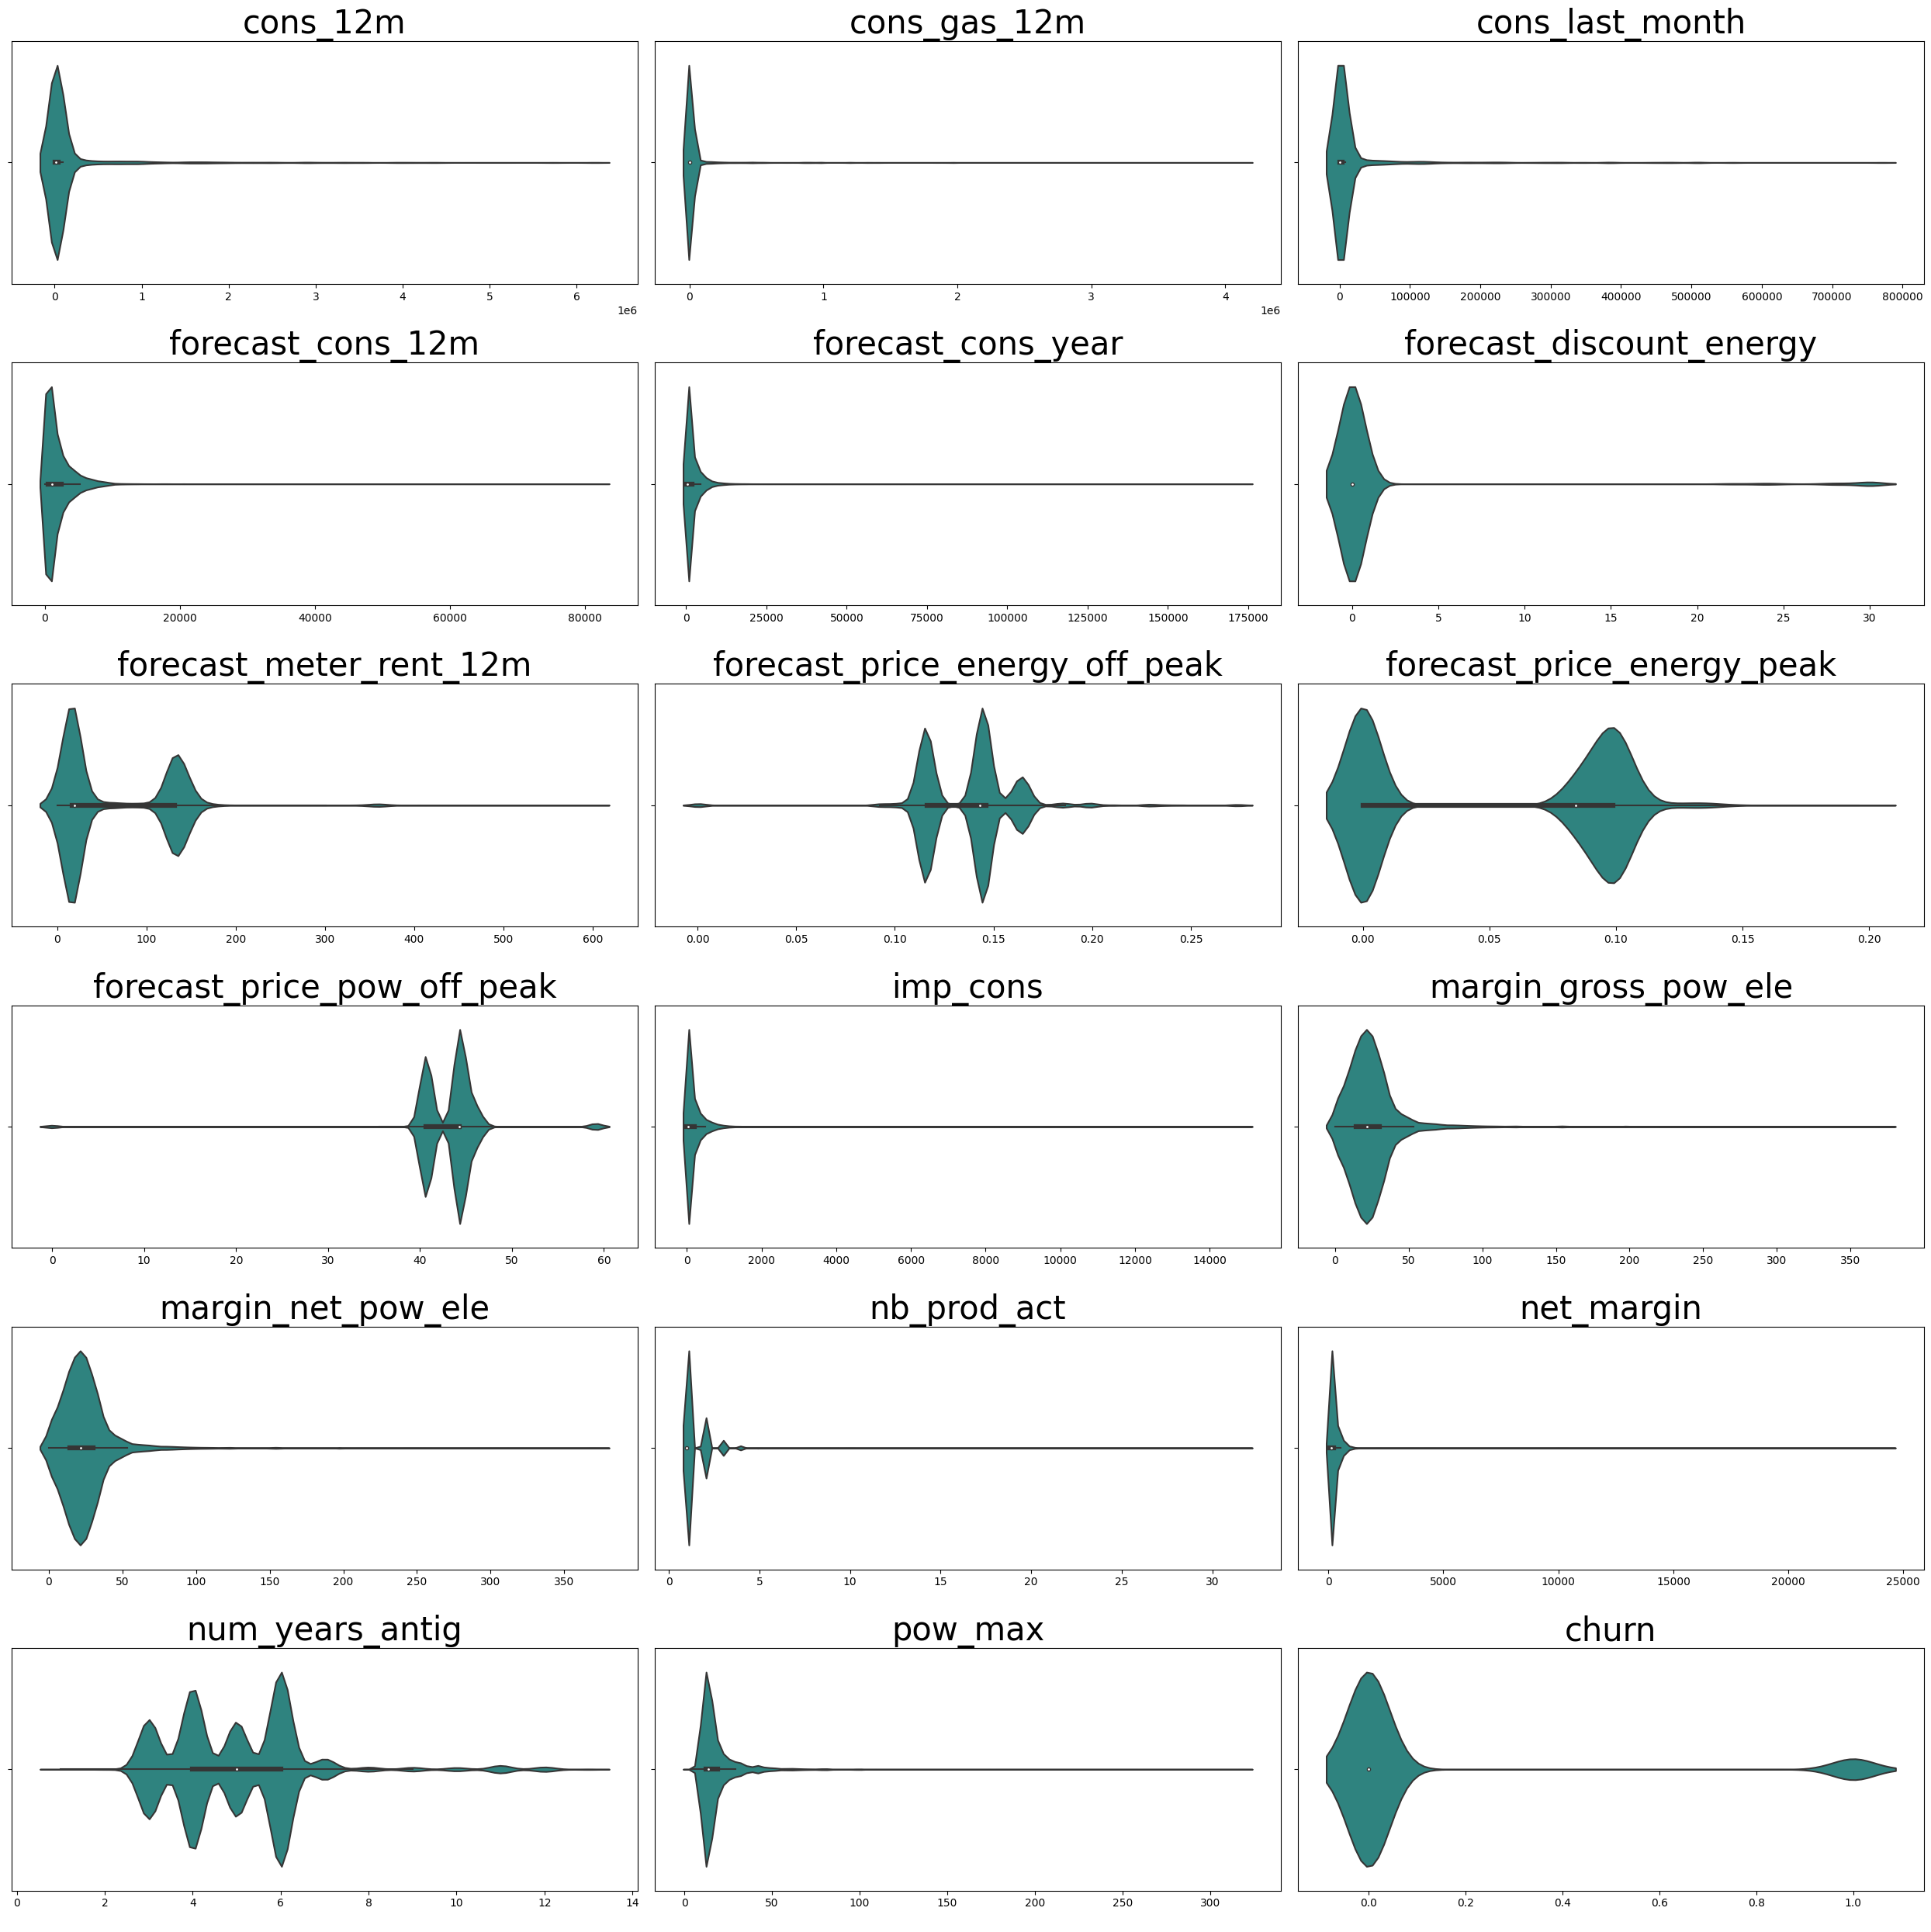

In [18]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.violinplot(x=client[num_client[i]], palette='viridis', shade=True)
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

#### Boxplot Price Dataset

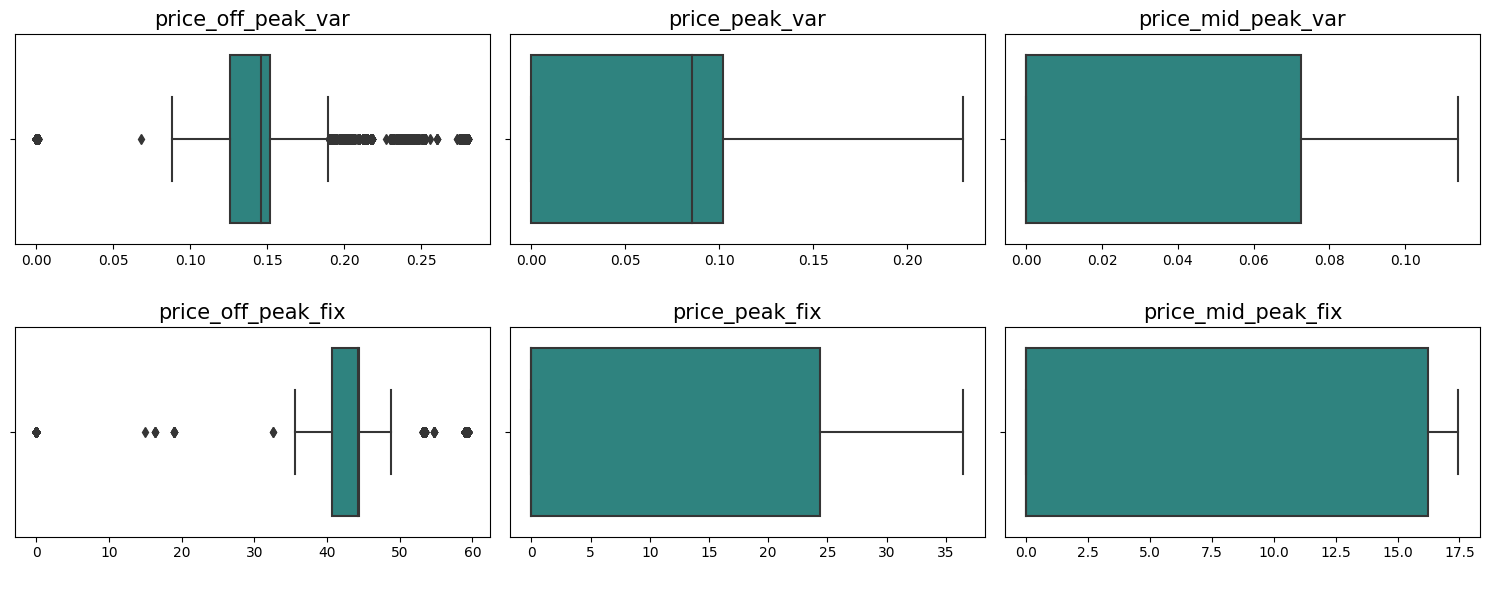

In [19]:
plt.figure(figsize=(15,6))
for i in range(0, len(num_price)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=price[num_price[i]], palette='viridis')
    plt.title(num_price[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

#### KDE Plot Price Dataset

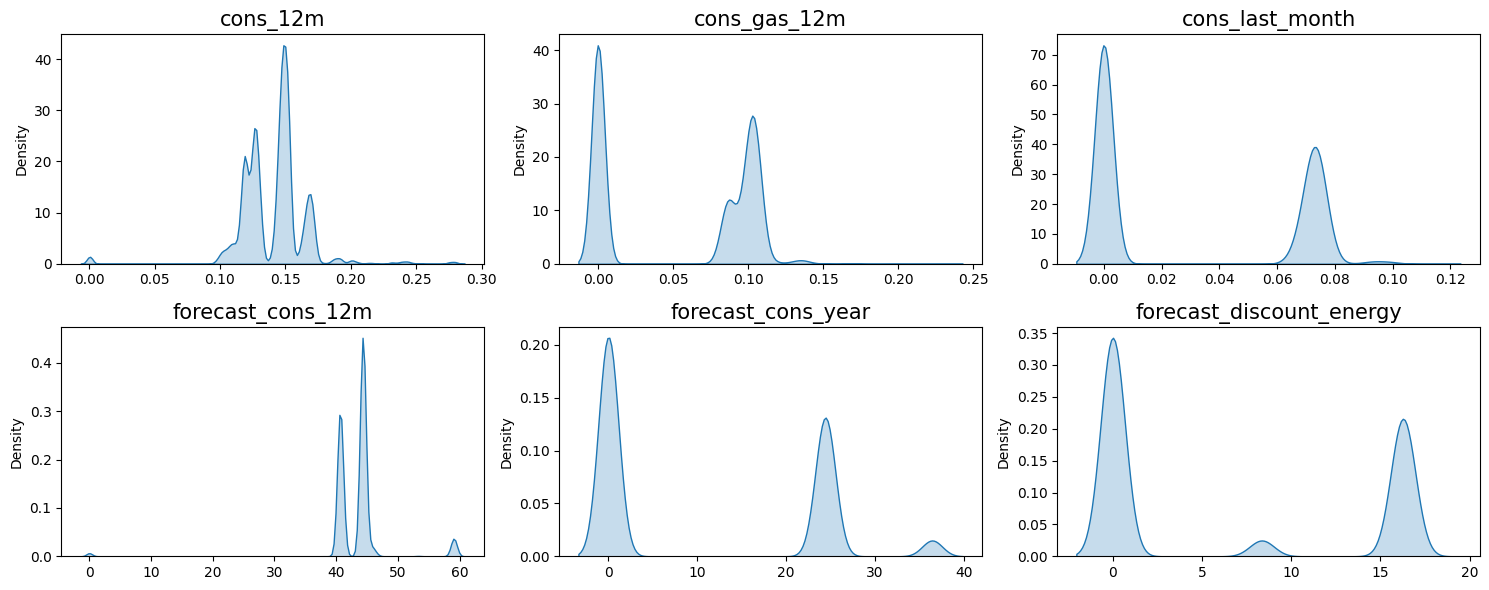

In [20]:
plt.figure(figsize=(15,6))
for i in range(0, len(num_price)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=price[num_price[i]], palette = 'viridis', shade = True)
    plt.title(num_client[i], fontsize = 15)
    plt.xlabel('')
    plt.tight_layout()

#### Violinplot Price Dataset

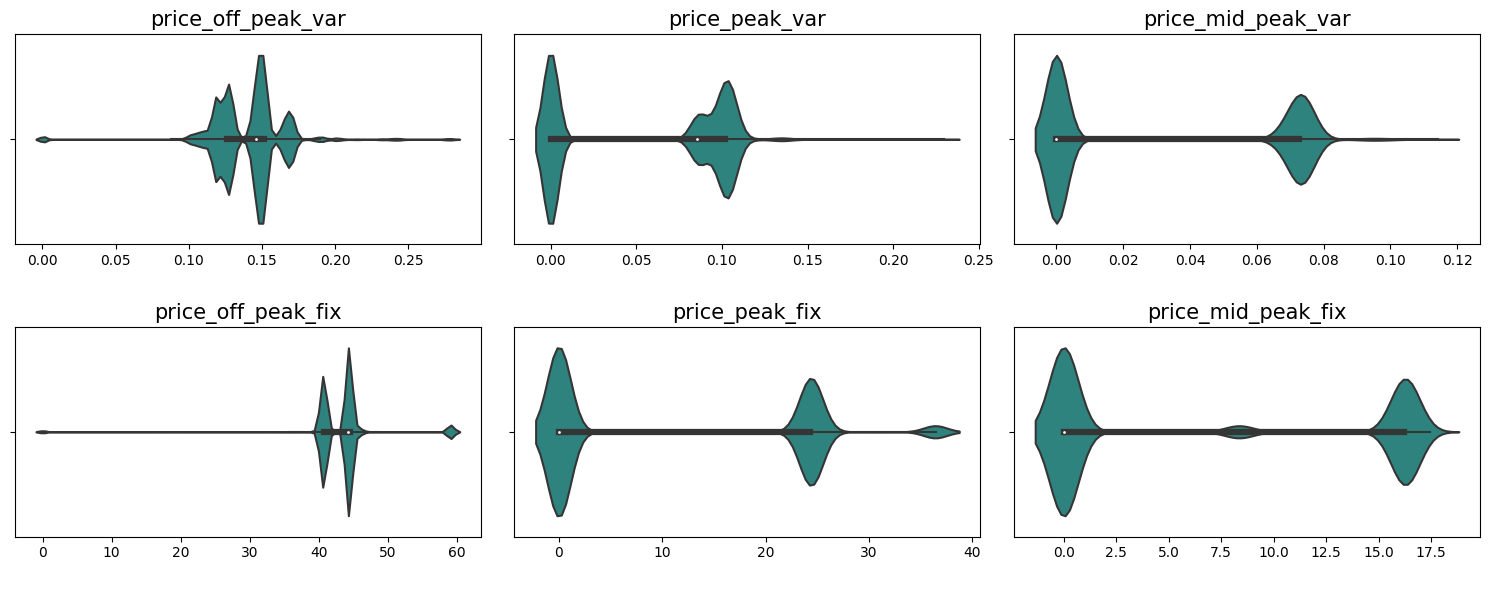

In [21]:
plt.figure(figsize=(15,6))
for i in range(0, len(num_price)):
    plt.subplot(2,3,i+1)
    sns.violinplot(x=price[num_price[i]], palette='viridis', shade=True)
    plt.title(num_price[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis
### Client Dataset

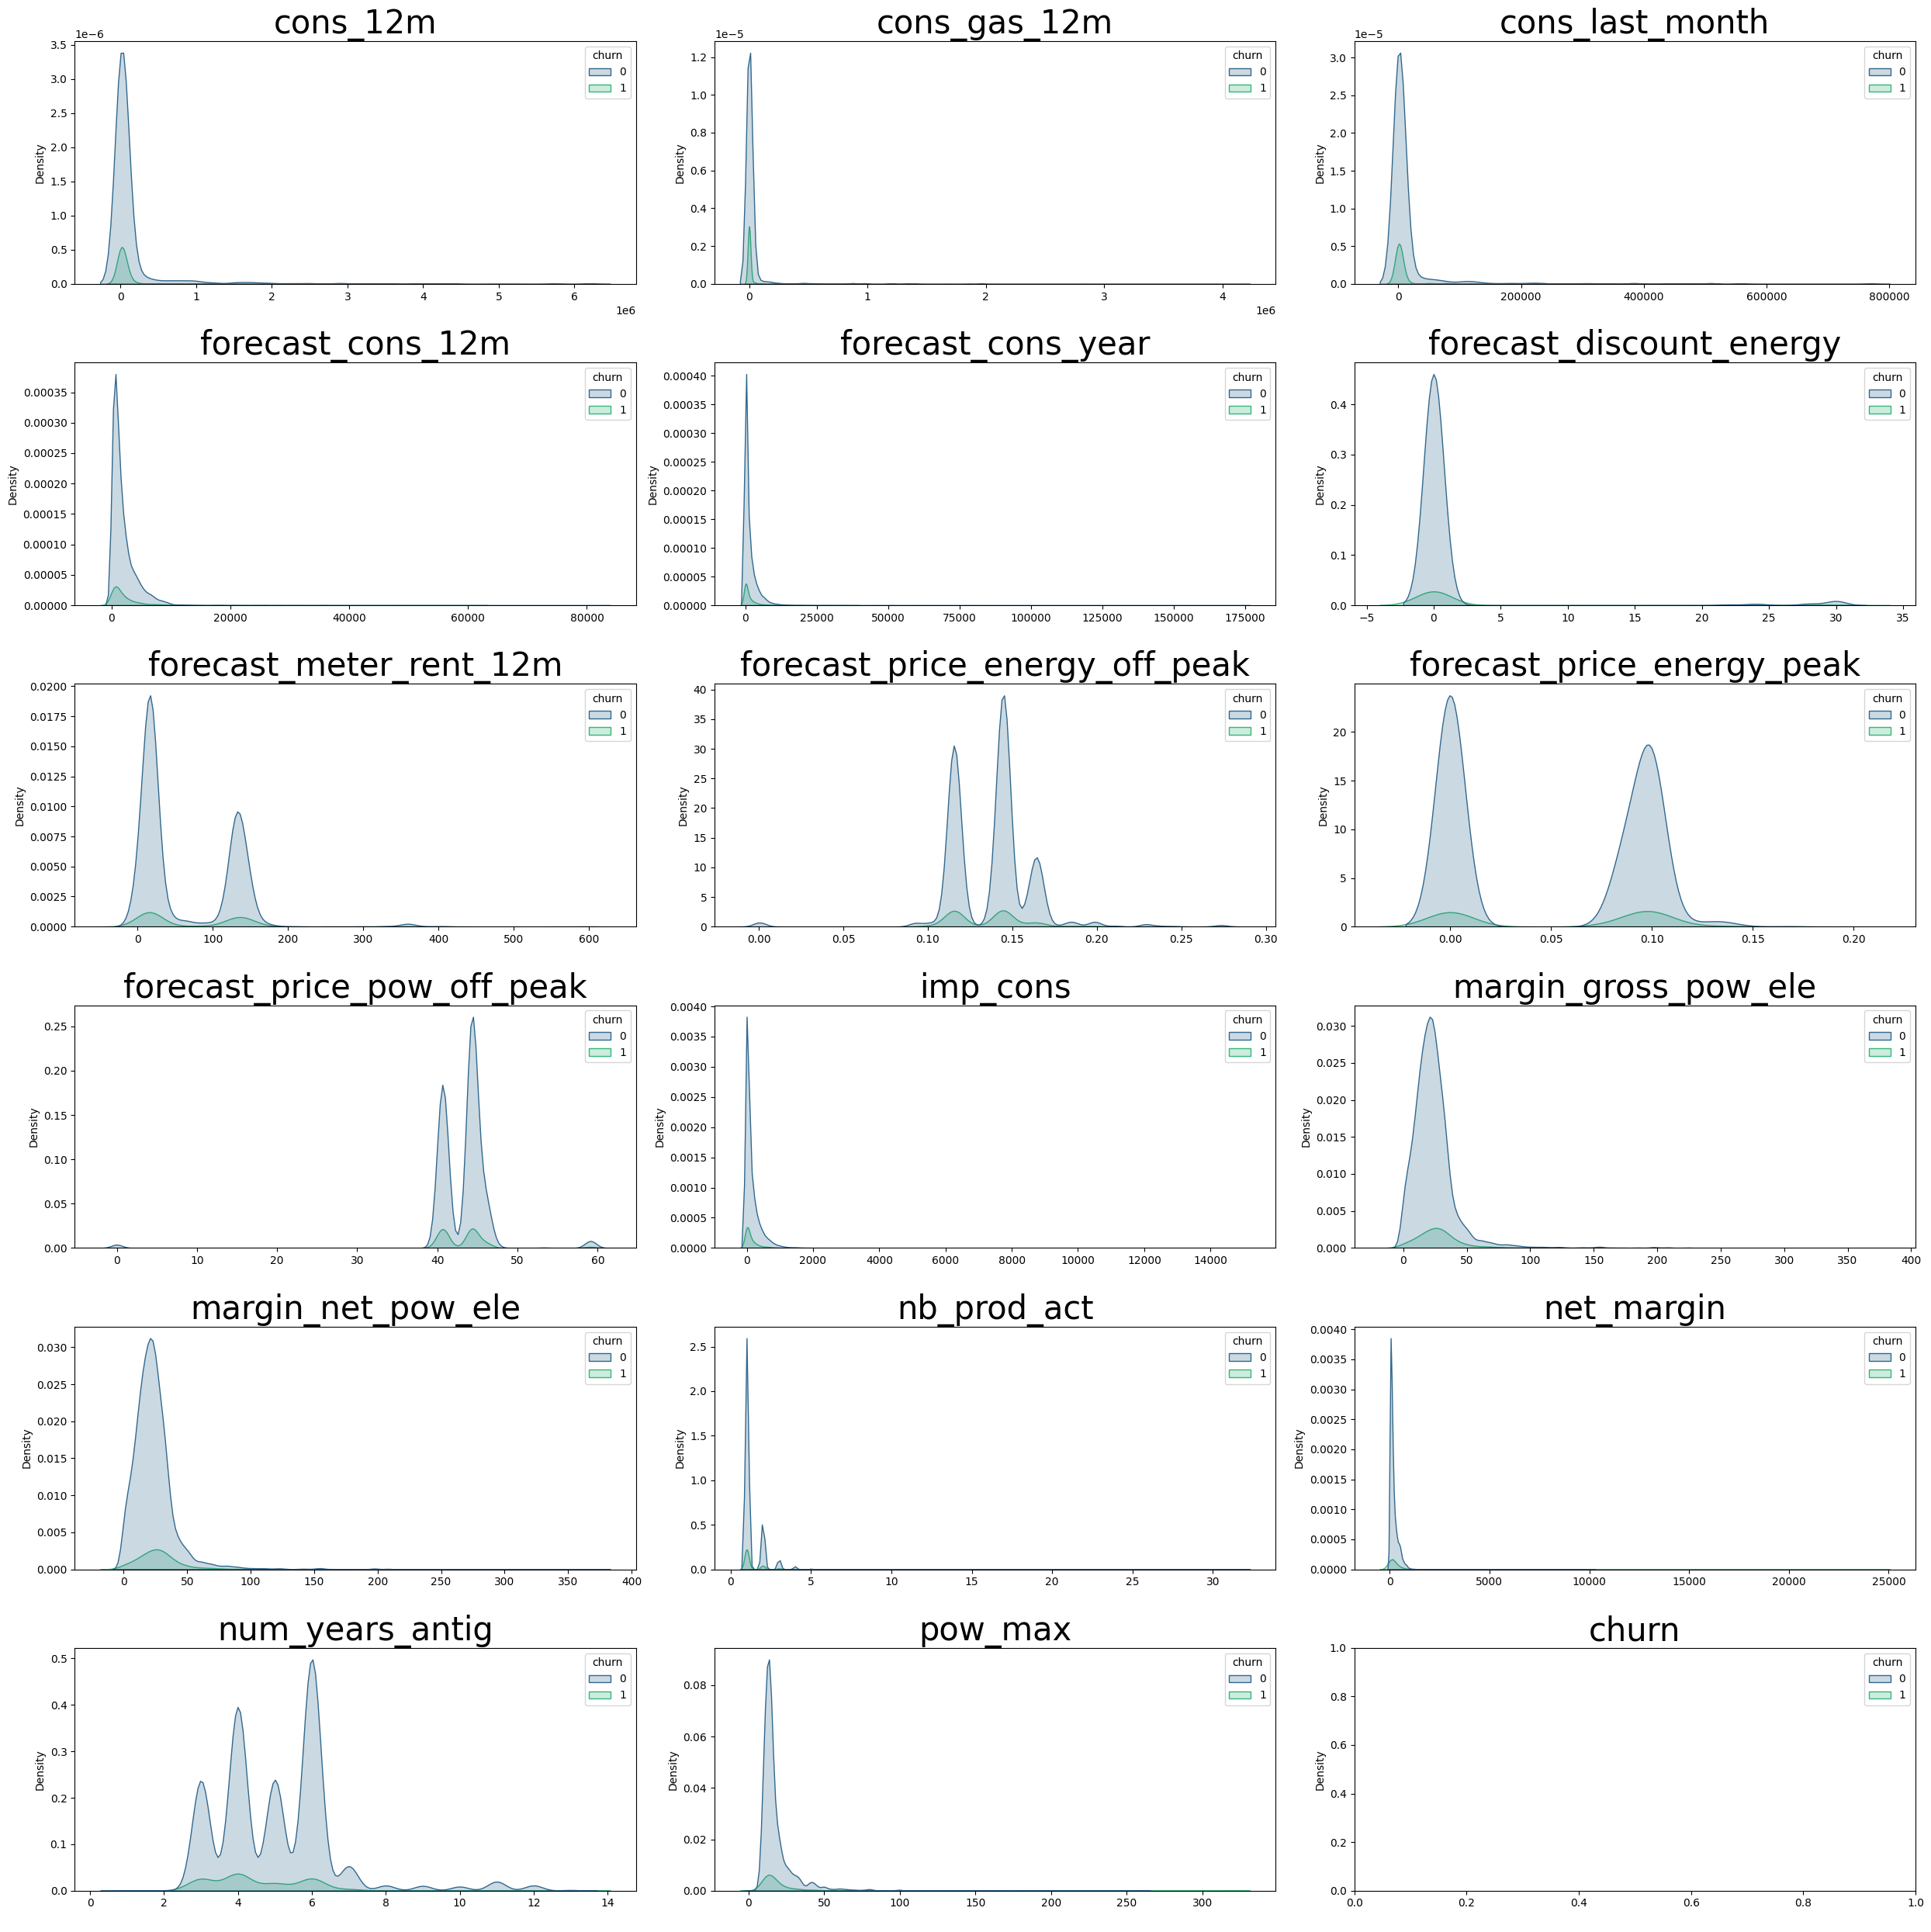

In [22]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=client[num_client[i]], palette='viridis', shade=True, hue=client['churn'])
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

#### Correlation Heatmap Client Dataset

<AxesSubplot: >

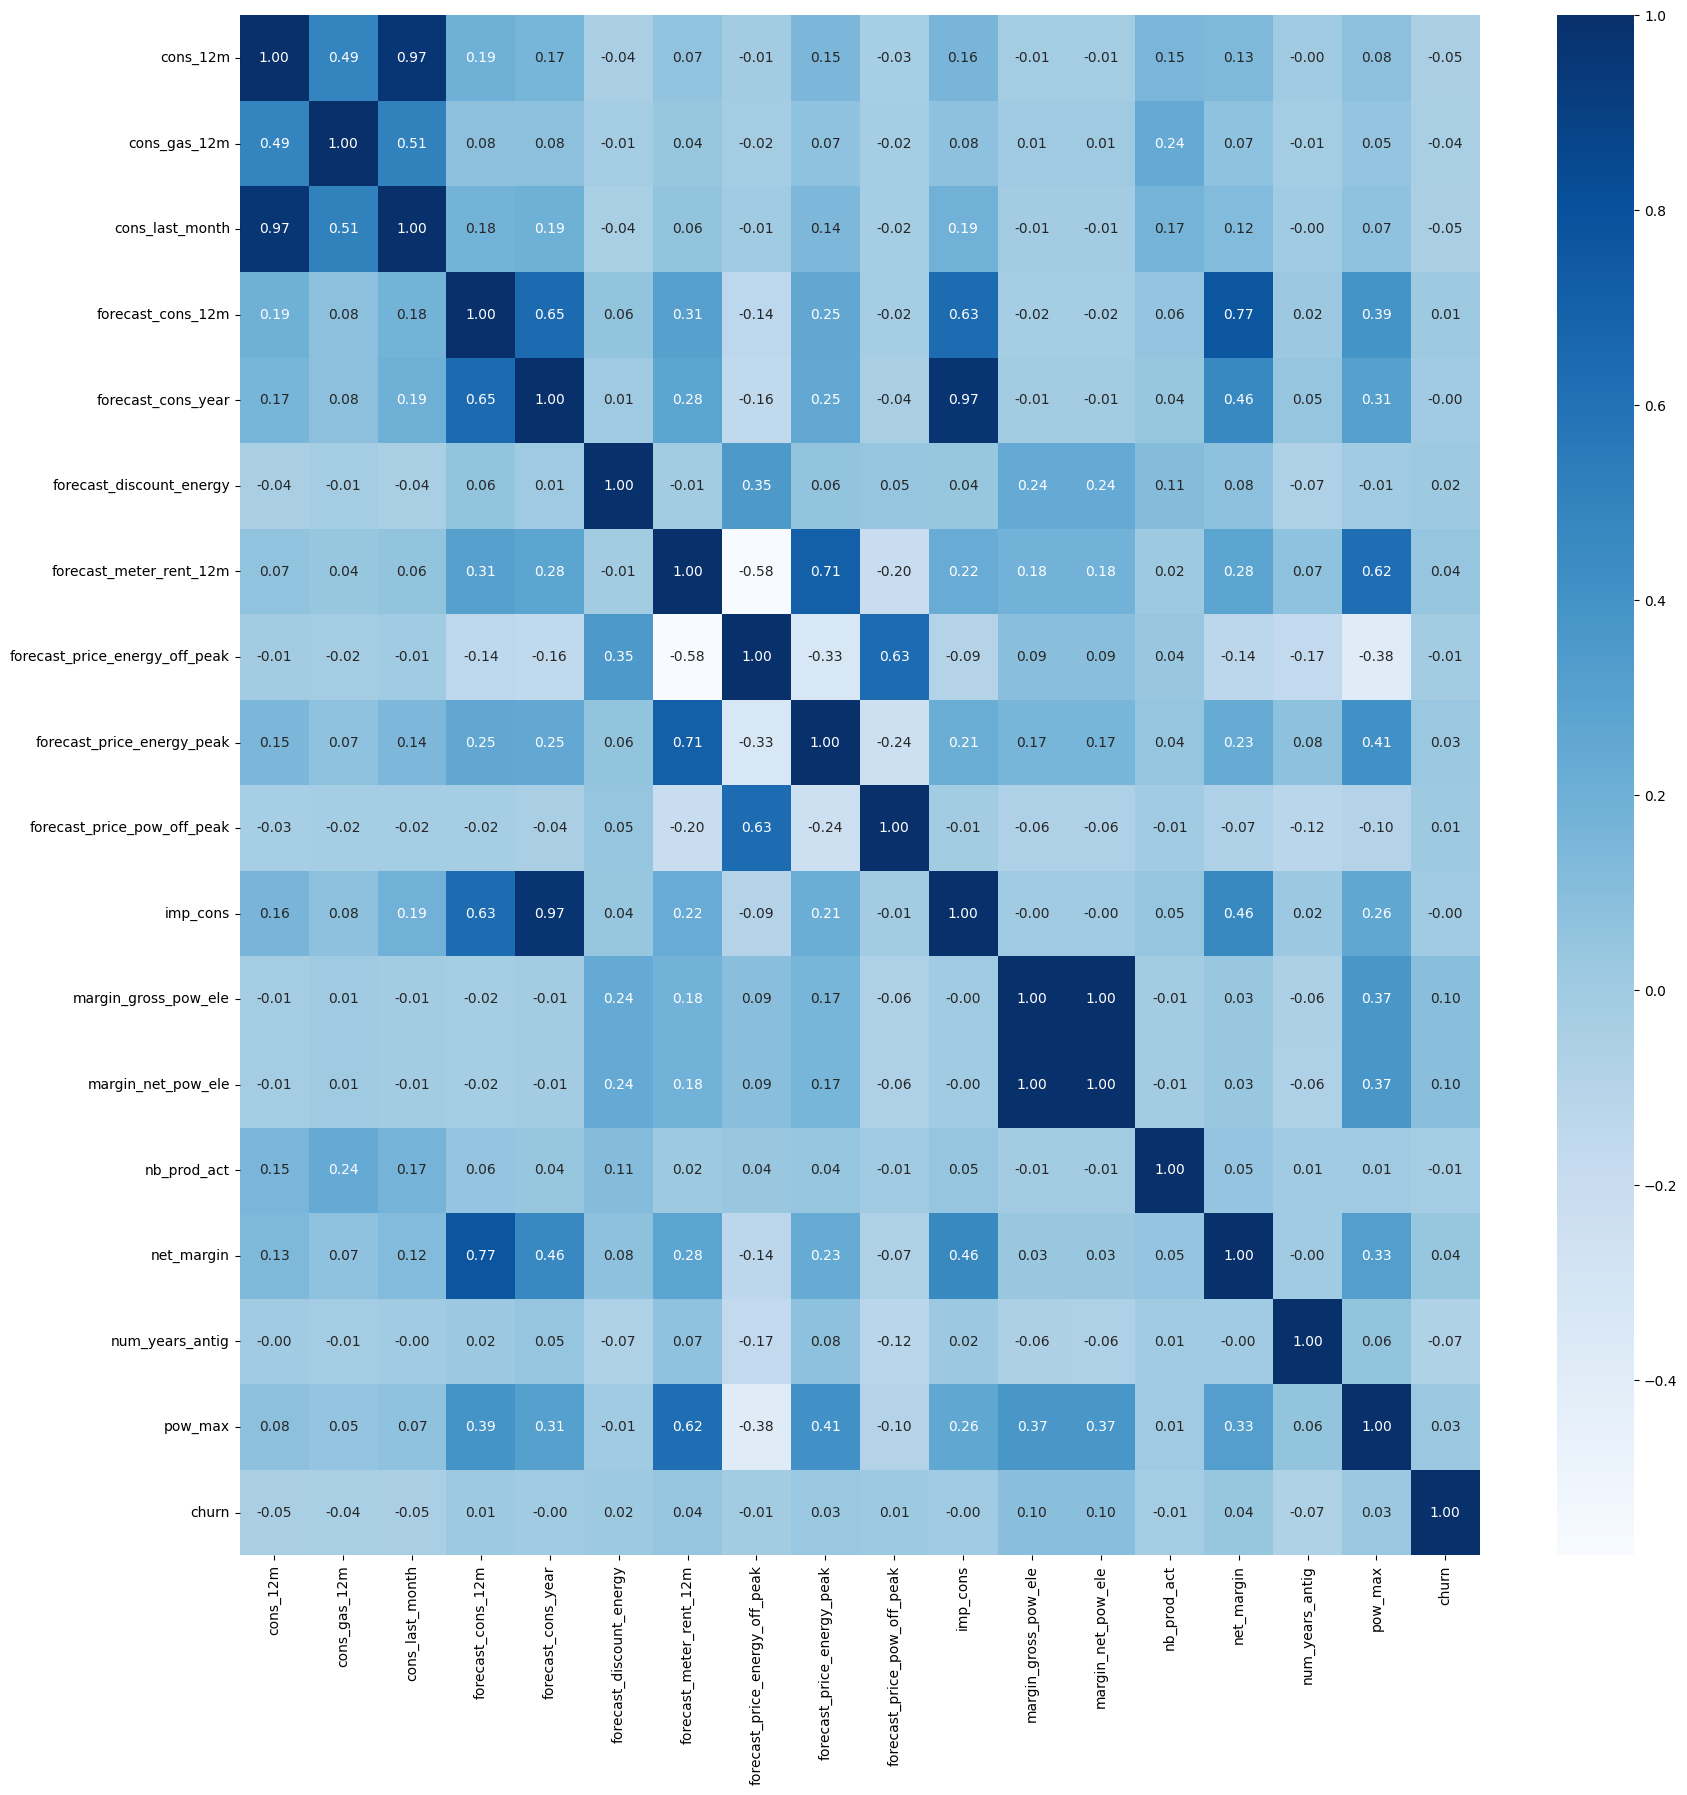

In [23]:
corr = client.corr()
plt.figure(figsize=(20, 20))
# Create a heatmap plot
sns.heatmap(corr, annot=True, cmap='Blues', fmt = '.2f')

## Insights

### `Churn Percentage`

In [24]:
churn_percent = client.groupby('churn')['churn'].count()/len(client)*100
churn_percent

churn
0    90.284814
1     9.715186
Name: churn, dtype: float64

Text(0.5, 1.0, 'Churn Percentage')

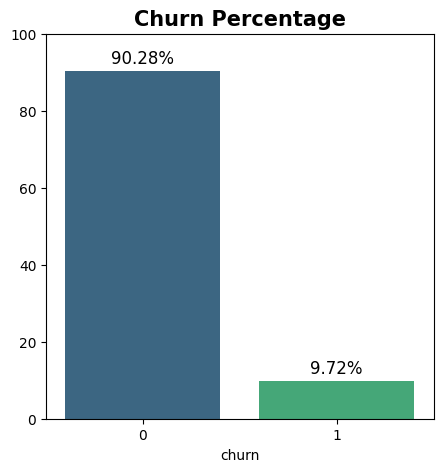

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=churn_percent.index, y=churn_percent.values, palette = 'viridis')

plt.bar_label(ax.containers[0], padding=3, fmt='%.2f%%', fontsize = 12)
plt.ylim(0,100)
plt.title('Churn Percentage', fontsize=15, weight='extra bold')


### `Consumption`

In [26]:
consumption = client[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']

In [27]:
consumption['has_gas'] = np.where(consumption['has_gas'] == 'f', 0,1)

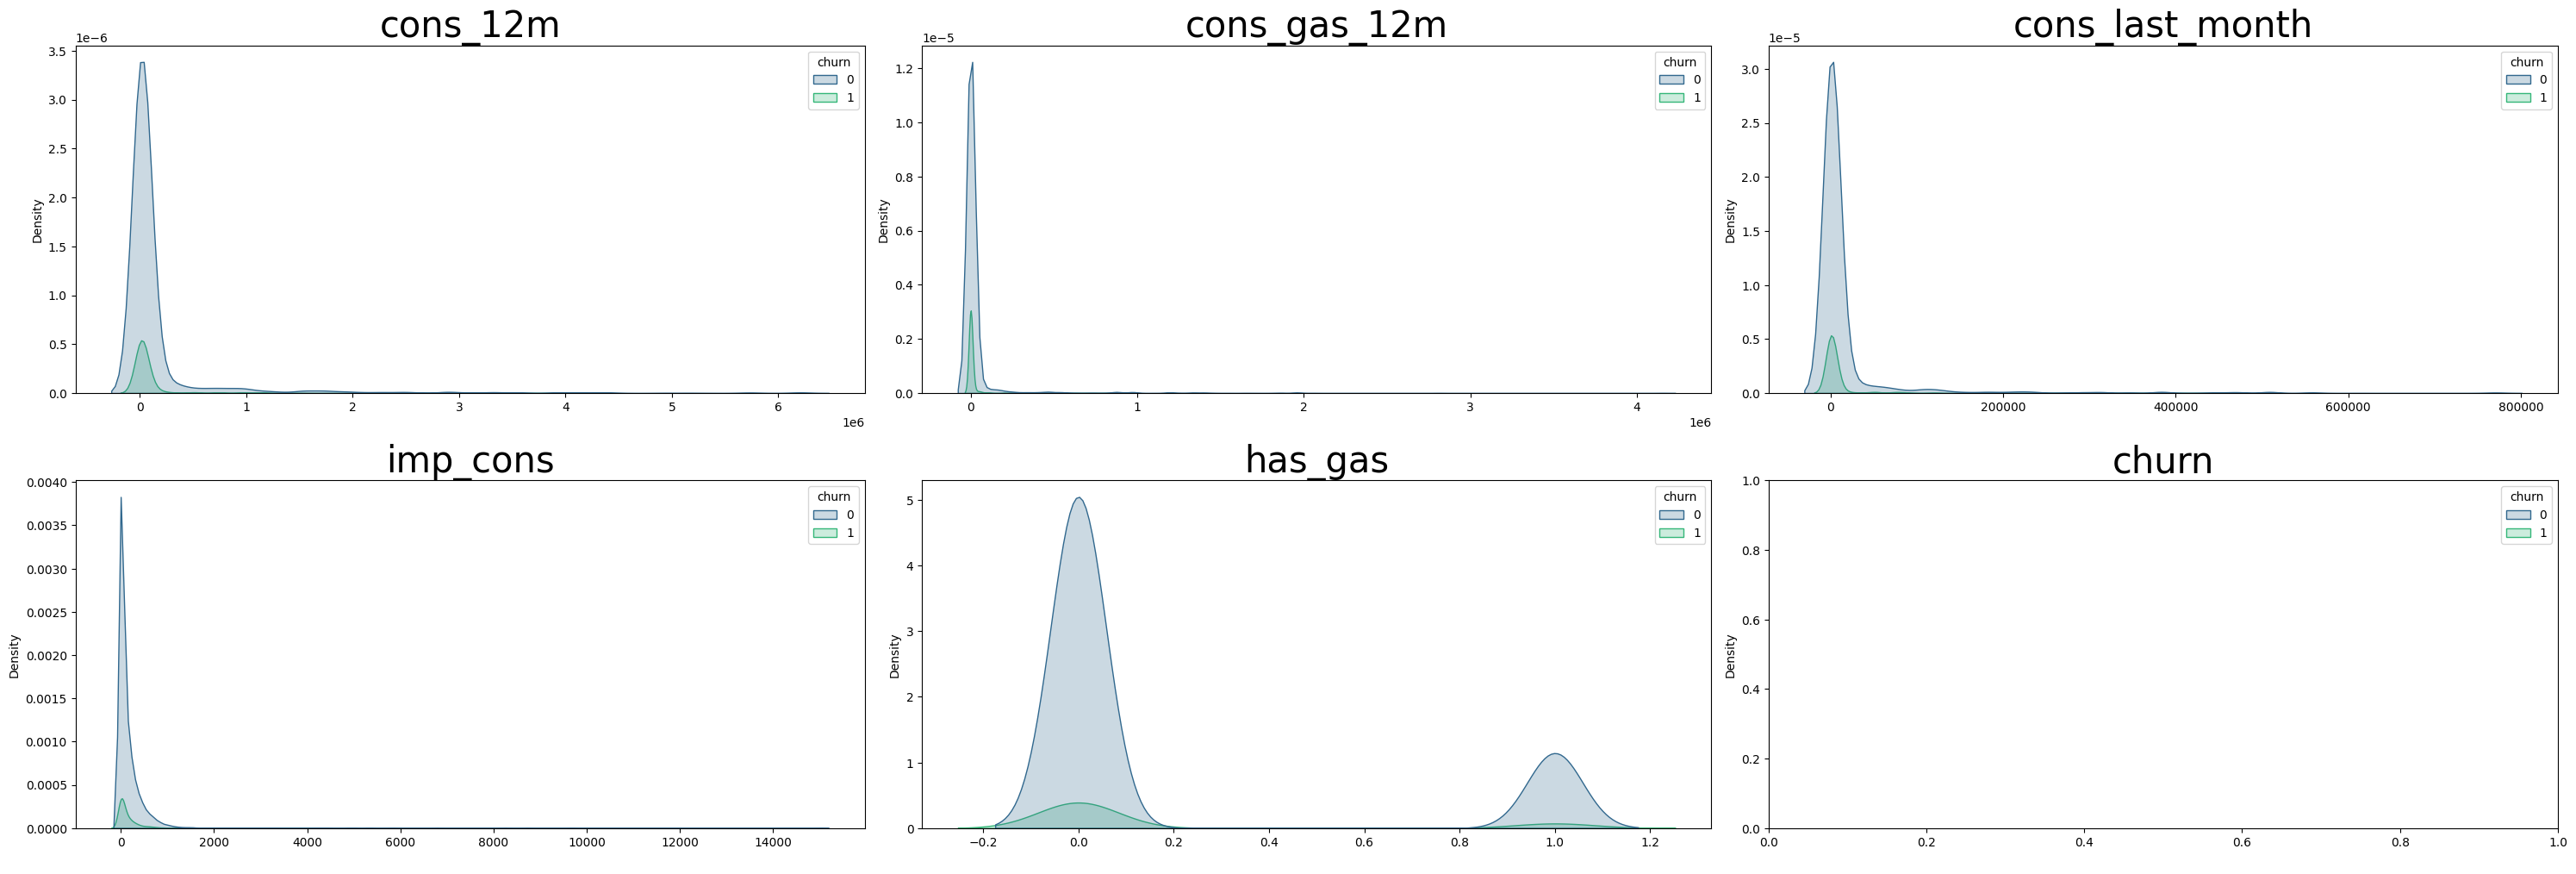

In [28]:
plt.figure(figsize=(30,30))
for i in range(0, len(cons)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=consumption[cons[i]], palette='viridis', shade=True, hue=client['churn'])
    plt.title(cons[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

### `Price Sensitivity`
Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [29]:
# Transform date columns to datetime type
client['date_activ'] = pd.to_datetime(client['date_activ'], format = '%Y-%m-%d')
client["date_end"] = pd.to_datetime(client["date_end"], format='%Y-%m-%d')
client["date_modif_prod"] = pd.to_datetime(client["date_modif_prod"], format='%Y-%m-%d')
client["date_renewal"] = pd.to_datetime(client["date_renewal"], format='%Y-%m-%d')
price['price_date'] = pd.to_datetime(price['price_date'], format='%Y-%m-%d')

In [30]:
# Create mean average data
mean_year = price.groupby(['id']).mean().reset_index()
mean_6m = price[price['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price[price['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [31]:
mean_6m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000


In [32]:
mean_year["mean_year_price_p1"] = mean_year["price_off_peak_var"] + mean_year["price_off_peak_fix"]
mean_year["mean_year_price_p2"] = mean_year["price_mid_peak_var"] + mean_year["price_mid_peak_fix"]
mean_year["mean_year_price_p3"] = mean_year["price_peak_var"] + mean_year["price_peak_fix"]



mean_6m["mean_6m_price_p1"] = mean_6m["price_off_peak_var"] + mean_6m["price_off_peak_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["price_mid_peak_var"] + mean_6m["price_mid_peak_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["price_peak_var"] + mean_6m["price_peak_fix"]



mean_3m["mean_3m_price_p1"] = mean_3m["price_off_peak_var"] + mean_3m["price_off_peak_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["price_mid_peak_var"] + mean_3m["price_mid_peak_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["price_peak_var"] + mean_3m["price_peak_fix"]

In [33]:
mean_year

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,16.353854,24.524832
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,16.328003,24.486748
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,16.588752,24.752581
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,16.858411,25.025265
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,16.316414,24.467516


In [34]:
mean_year.shape

(16096, 10)

In [35]:
#Merge into one dataframe

price_features = mean_year.merge(mean_6m, on ='id').merge(mean_3m, on='id').merge(client[['id', 'churn']],on = 'id')
price_features

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,16.353854,24.524832,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,16.366476,24.542872,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,16.367015,24.540743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,ffebf6a979dd0b17a41076df1057e733,0.122426,0.102375,0.072210,40.606699,24.364017,16.242678,40.729125,16.314889,24.466392,...,0.115916,0.099461,0.071884,40.728885,24.43733,16.291555,40.844801,16.363439,24.536791,0
14601,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,...,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000,0
14602,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,16.858411,25.025265,...,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,41.380284,16.882949,25.064201,0
14603,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,16.316414,24.467516,...,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,16.366071,24.537821,0


In [36]:
price_features.shape

(14605, 29)

Text(0.5, 1.0, 'Correlation on Target Feature')

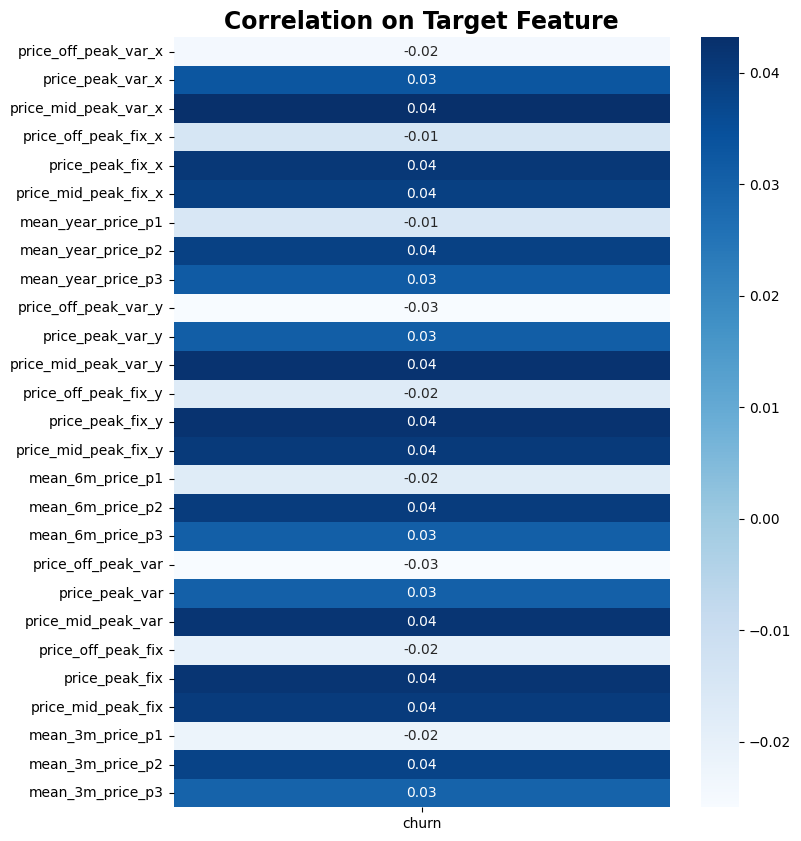

In [37]:
#Creating a heatmap correlation chart for the data avaliable
corr = price_features.corr(method = 'kendall')[price_features.corr(method = 'kendall').index != 'churn'][['churn']]
price_features.corr(method = 'kendall')[price_features.corr(method = 'kendall').index != 'churn'][['churn']]
plt.figure(figsize=(8,10))
sns.heatmap(corr, cmap='Blues', annot = True, fmt = '.2f')
plt.title('Correlation on Target Feature', fontsize=17, weight='extra bold')

Insights :
* All price features have low correlation to target (churn)
* Our client have approximately 10% churn customer
* All consumption features are positively skewed
* There are no high correlation among independent features to target feature
* the highest correlation are just 0.10 on margin feature

# Data Preprocessing
## Data Info

In [38]:
df = pd.merge(client.drop('churn', axis = 1), price_features, on= 'id')
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,8.438721,36.583870,1
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,1
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0


In [39]:
df.shape

(14605, 53)

In [40]:
# Create Data Info After Convert

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]),df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df    


,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,object,0,0.0,14605,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
1,channel_sales,object,0,0.0,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
2,cons_12m,int64,0,0.0,11064,"[0, 4660, 544, 1584]"
3,cons_gas_12m,int64,0,0.0,2111,"[54946, 0, 1542867, 80583]"
4,cons_last_month,int64,0,0.0,4751,"[0, 526, 1998, 1260]"
5,date_activ,datetime64[ns],0,0.0,1796,"[2013-06-15T00:00:00.000000000, 2009-08-21T00:..."
6,date_end,datetime64[ns],0,0.0,368,"[2016-06-15T00:00:00.000000000, 2016-08-30T00:..."
7,date_modif_prod,datetime64[ns],0,0.0,2129,"[2015-11-01T00:00:00.000000000, 2009-08-21T00:..."
8,date_renewal,datetime64[ns],0,0.0,386,"[2015-06-23T00:00:00.000000000, 2015-08-31T00:..."
9,forecast_cons_12m,float64,0,0.0,13992,"[0.0, 189.95, 47.96, 240.04]"


## Feature Engineering

In [41]:
price['price_date'].value_counts().sort_index()

2015-01-01    16070
2015-02-01    16082
2015-03-01    16074
2015-04-01    16079
2015-05-01    16080
2015-06-01    16085
2015-07-01    16090
2015-08-01    16094
2015-09-01    16082
2015-10-01    16085
2015-11-01    16087
2015-12-01    16094
Name: price_date, dtype: int64

### `Price Difference in Jan-Dec`

In [42]:
monthly_price_by_id = price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885


In [43]:
# Group off-peak prices by companies and month
monthly_price_by_id = price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.335085
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916


In [44]:
diff.shape

(16096, 3)

In [45]:
df = pd.merge(df, diff, on = 'id')
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0,-0.008653,0.177779
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.070990,59.173468,36.490689,8.367731,59.275820,8.438721,36.583870,1,-0.007395,0.236694
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,1,-0.006192,0.162916
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779


In [46]:
df.shape

(14605, 55)

### `Price Difference Between Peak Periods`
find useful pattern using differece between all periods (same as jan-dec difference, we will find the difference accross the periods)

In [47]:
avg_prices = price.groupby('id').agg(price_off_peak_energy=('price_off_peak_var','mean'),
                                        price_mid_peak_energy=('price_mid_peak_var','mean'),
                                        price_peak_energy=('price_peak_var','mean'),
                                        price_off_peak_power=('price_off_peak_fix','mean'),
                                        price_mid_peak_power=('price_mid_peak_fix','mean'),
                                        price_peak_power=('price_peak_fix','mean')).reset_index()
# Calculate the mean difference between consecutive periods
avg_prices['offpeak_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_peak_energy']
avg_prices['peak_mid_avg_price_energy_diff'] = avg_prices['price_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['off_mid_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['offpeak_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_peak_power']
avg_prices['peak_mid_avg_price_power_diff'] = avg_prices['price_peak_power'] - avg_prices['price_mid_peak_power']
avg_prices['off_mid_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_mid_peak_power']

avg_prices.head()

,id,price_off_peak_energy,price_mid_peak_energy,price_peak_energy,price_off_peak_power,price_mid_peak_power,price_peak_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.073160,0.103794,40.701732,16.280694,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.069032,0.098292,40.647427,16.258971,24.388455,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930


In [48]:
avg_prices.shape

(16096, 13)

In [49]:
# add the different columns to the dataframe
col = avg_prices.iloc[:, [0,-6,-5,-4,-3,-2,-1]].columns

df = pd.merge(df, avg_prices[col], on = 'id')
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0,-0.008653,0.177779,0.144124,0.000000,0.144124,44.370635,0.000000,44.370635
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,36.583870,1,-0.007395,0.236694,0.011393,0.024589,0.035982,22.622294,28.047961,50.670256
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,24.539003,1,-0.006192,0.162916,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375


In [54]:
df.shape

(14605, 61)

### `Tenure`

In [50]:
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])


df['Tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

### `Month`

In [51]:
from datetime import datetime

#Define function
def convert_months(reference_date, df, column):
    time_diff = reference_date - df[column]
    months = (time_diff/ np.timedelta64(1, 'M')).astype(int)
    return months

#define reference date 
reference_date = datetime(2016, 1, 1)

df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

#drop original features

drop_list = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
df = df.drop(drop_list, axis = 1)
df


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,0.000000,0.144124,44.370635,0.000000,44.370635,3,43,4,7,19
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,0.100167,...,0.024589,0.035982,22.622294,28.047961,50.670256,4,40,7,40,4
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,0.116900,...,0.030633,0.051178,16.280694,8.140345,24.421038,3,46,1,46,10
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,0.145711,...,0.007124,0.149609,44.311375,0.000000,44.311375,4,40,7,40,4


### Feature Encoding

In [56]:
cat = df.select_dtypes(include='object').columns
cat

Index(['id', 'channel_sales', 'origin_up'], dtype='object')

In [53]:
# has_gas
df['has_gas'] = np.where(df['has_gas']=='f',0,1)
df['has_gas'].value_counts()

0    11955
1     2650
Name: has_gas, dtype: int64

In [55]:
df.shape

(14605, 62)

In [57]:
# origin_up and channel_sales
categorical_features = pd.get_dummies(df[cat].iloc[:,[1,2]])

# drop original feature
df = df.drop(['channel_sales', 'origin_up'], axis=1)

# concat
df = pd.concat([df, categorical_features], axis=1)
df.shape

(14605, 74)

In [59]:
df.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,1,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,1,0,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,0,0,0,0,1,0,0,0


## Train Test Split

In [66]:
pip install scikit-learn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ahmed\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [68]:
pip install xgboost

You should consider upgrading via the 'C:\Users\ahmed\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [67]:
from sklearn.model_selection import train_test_split

#lets seperate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'churn'], axis= 1),
                                                   df.churn,
                                                   test_size =0.3,
                                                   random_state = 123)
X_train.shape, X_test.shape

((10223, 72), (4382, 72))

## Handling Imbalaced Target

In [72]:
df['churn'].value_counts(normalize = True)*100

0    90.284149
1     9.715851
Name: churn, dtype: float64

In [73]:
counts = df['churn'].value_counts()

# Calculate the class balance
class_balance = counts[0] / counts[1]
class_balance

9.29245947850599

In [75]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ahmed\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [76]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

# Modeling

In [78]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, make_scorer

## Basic Modeling

In [79]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.704929,0.146689,0.388889,0.213025,0.770207
1,Decision Tree,0.818348,0.191071,0.237778,0.211881,0.889770
2,Random Forest,0.897079,0.494845,0.106667,0.175503,0.970119
3,Ada Boost,0.704929,0.146689,0.388889,0.213025,0.770207
4,Gradient Boost,0.880648,0.281437,0.104444,0.152350,0.955724
5,XG Boost,0.904838,0.609272,0.204444,0.306156,0.955724


## Hyperparameter Tuning Random Forest

max_depth: 1; train: 0.741122384273938; test: 0.7441773901946187
max_depth: 2; train: 0.8071554199968831; test: 0.8126534663810668
max_depth: 3; train: 0.84333098094566; test: 0.8522404258618018
max_depth: 4; train: 0.8683080697450277; test: 0.8721468229487971
max_depth: 5; train: 0.9149718736477715; test: 0.9144700086342629
max_depth: 6; train: 0.945719802617464; test: 0.9378781766841467
max_depth: 7; train: 0.9620396479535163; test: 0.9503841711444786
max_depth: 8; train: 0.968027660982221; test: 0.9560593900481541
max_depth: 9; train: 0.9735730739697979; test: 0.9601985061907867
max_depth: 10; train: 0.9775791449782405; test: 0.961316831187052
max_depth: 11; train: 0.9824516459587551; test: 0.9652722177742195
max_depth: 12; train: 0.986320401838196; test: 0.9657157157157158
max_depth: 13; train: 0.9895264409175609; test: 0.9677096870938717
max_depth: 14; train: 0.9917603639172604; test: 0.9670000000000001
max_depth: 15; train: 0.9946675840715574; test: 0.9676451467720156
max_depth: 

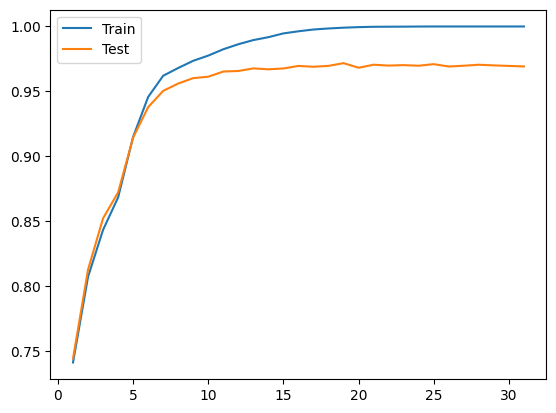

In [84]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 15; train: 0.9946675840715574; test: 0.9676451467720156

min_samples_split: 2; train: 0.9946675840715574; test: 0.9676451467720156
min_samples_split: 4; train: 0.9920634920634921; test: 0.970014992503748
min_samples_split: 7; train: 0.9897917692126608; test: 0.9688140336848418
min_samples_split: 10; train: 0.9875844089238398; test: 0.9692576855786054
min_samples_split: 13; train: 0.986294351223261; test: 0.966701664916754
min_samples_split: 16; train: 0.9856179583475588; test: 0.9709247139931059
min_samples_split: 19; train: 0.984373667604673; test: 0.9662415603900975
min_samples_split: 22; train: 0.984055592266536; test: 0.9680563887222555
min_samples_split: 25; train: 0.9840380189242179; test: 0.9685562887422516
min_samples_split: 27; train: 0.9834458955621365; test: 0.9674516274186291
min_samples_split: 30; train: 0.9829360260752862; test: 0.9675162418790605
min_samples_split: 33; train: 0.982644804088586; test: 0.9674032596740325
min_samples_split: 36; train: 0.9819165477432957; test: 0.9663550467429886
min_samples_split: 39; train: 0.98

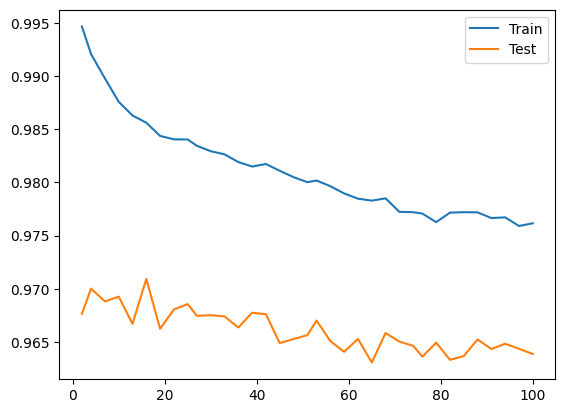

In [85]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_samples_split: 7; train: 0.9897917692126608; test: 0.9688140336848418

In [86]:
model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                         random_state=123,
                                         min_samples_split=7)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)

print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.9897917692126608
F2 Test RF Score : 0.9688140336848418


In [87]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.99
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9254
           1       0.99      0.52      0.69       969

    accuracy                           0.95     10223
   macro avg       0.97      0.76      0.83     10223
weighted avg       0.96      0.95      0.95     10223

Confussion Matrix ------------------------------------
[[9250    4]
 [ 461  508]]


TESTING RESULT:
F2 Score: 0.969
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      3932
           1       0.46      0.10      0.17       450

    accuracy                           0.90      4382
   macro avg       0.68      0.54      0.56      4382
weighted avg       0.86      0.90      0.86      4382

Confussion Matrix ------------------------------------
[[3877   55]
 [ 404   46]]


<AxesSubplot: >

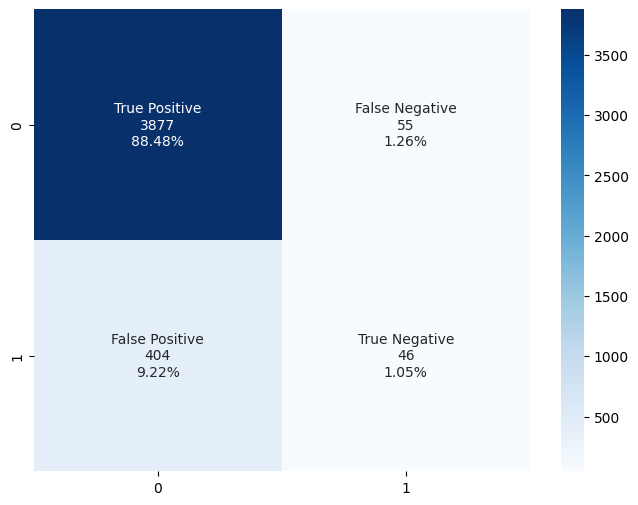

In [88]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [98]:
df.to_csv('df_cleaned.csv')

## Remodeling

In [99]:
df = pd.read_csv('df_cleaned.csv', index_col=0)
df = df.iloc[:,:-14] # removing encoded categorical features
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


In [100]:
df.shape

(14605, 60)

In [101]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['churn','id'], axis=1),
                                                    df['churn'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((10223, 58), (4382, 58))

In [102]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [103]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

In [104]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.681196,0.146905,0.437778,0.219989,0.742714
1,Decision Tree,0.806937,0.185714,0.260000,0.216667,0.877567
2,Random Forest,0.894797,0.452174,0.115556,0.184071,0.967492
3,Ada Boost,0.681196,0.146905,0.437778,0.219989,0.742714
4,Gradient Boost,0.874030,0.257143,0.120000,0.163636,0.948744
5,XG Boost,0.898448,0.516556,0.173333,0.259567,0.948744


max_depth: 1; train: 0.6637791637791638; test: 0.670189701897019
max_depth: 2; train: 0.7793299847519957; test: 0.789086321101882
max_depth: 3; train: 0.9159992228147059; test: 0.9173381987735038
max_depth: 4; train: 0.9310152033202158; test: 0.9276292515287816
max_depth: 5; train: 0.9549613099055192; test: 0.9482542074855563
max_depth: 6; train: 0.9601383521574824; test: 0.9499648347231991
max_depth: 7; train: 0.9679413394722258; test: 0.9558307430061164
max_depth: 8; train: 0.969300678414473; test: 0.9534685272562995
max_depth: 9; train: 0.9752120721258366; test: 0.9588594908799358
max_depth: 10; train: 0.9802792879223964; test: 0.9622896634615385
max_depth: 11; train: 0.9842746495401881; test: 0.9646004406168637
max_depth: 12; train: 0.9871318028301482; test: 0.9643590128647946
max_depth: 13; train: 0.9897640155895325; test: 0.9674918729682422
max_depth: 14; train: 0.9923827915459715; test: 0.9663865546218489
max_depth: 15; train: 0.9942613966084209; test: 0.9672901870561169
max_dep

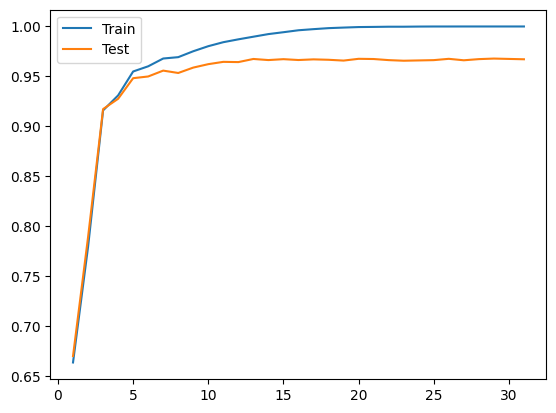

In [105]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

max_depth: 14; train: 0.9923827915459715; test: 0.9663865546218489

min_samples_split: 2; train: 0.9923827915459715; test: 0.9663865546218489
min_samples_split: 4; train: 0.9903386816906236; test: 0.9678951842776415
min_samples_split: 7; train: 0.9888123556087961; test: 0.9668867547018807
min_samples_split: 10; train: 0.9874789000235037; test: 0.9663781457947666
min_samples_split: 13; train: 0.9859786157884627; test: 0.9678951842776415
min_samples_split: 16; train: 0.9850940418816905; test: 0.9665483274163706
min_samples_split: 19; train: 0.9841957087403488; test: 0.965579347608565
min_samples_split: 22; train: 0.9844189615482992; test: 0.9672983649182458
min_samples_split: 25; train: 0.9830089325686997; test: 0.9672418104526131
min_samples_split: 27; train: 0.982923293395301; test: 0.9667900370111031
min_samples_split: 30; train: 0.98179841855112; test: 0.9656759731812269
min_samples_split: 33; train: 0.9817147241224984; test: 0.9641087250337889
min_samples_split: 36; train: 0.9809061074883859; test: 0.9634543178973717
min_samples_split: 39; train: 0.

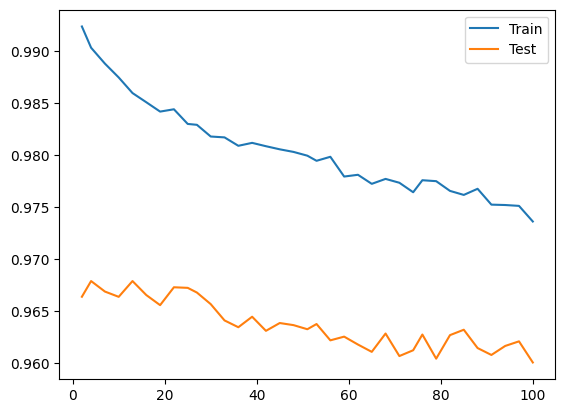

In [106]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_samples_split: 45; train: 0.9805676297622091; test: 0.9638584372027831

min_samples_leaf: 1; train: 0.9805676297622091; test: 0.9638584372027831
min_samples_leaf: 2; train: 0.9792243767313018; test: 0.9630019024732152
min_samples_leaf: 4; train: 0.9782678171939916; test: 0.9617888621794871
min_samples_leaf: 5; train: 0.9779761017274062; test: 0.9646181563407067
min_samples_leaf: 7; train: 0.976857179388825; test: 0.9622414742851421
min_samples_leaf: 9; train: 0.9765866337160997; test: 0.9628479871820548
min_samples_leaf: 10; train: 0.9768670387253439; test: 0.9643107418159975
min_samples_leaf: 12; train: 0.9763269480727024; test: 0.9626753507014028
min_samples_leaf: 14; train: 0.9746015511804312; test: 0.9640604665131642
min_samples_leaf: 15; train: 0.9755162053314581; test: 0.964003204165415
min_samples_leaf: 17; train: 0.9753031174753352; test: 0.9622320176317372
min_samples_leaf: 18; train: 0.9743983287501865; test: 0.9616251690797053
min_samples_leaf: 20; train: 0.974021822521524; test: 0.9613362047378172
min_samples_leaf: 22; train: 0.9722429488136101

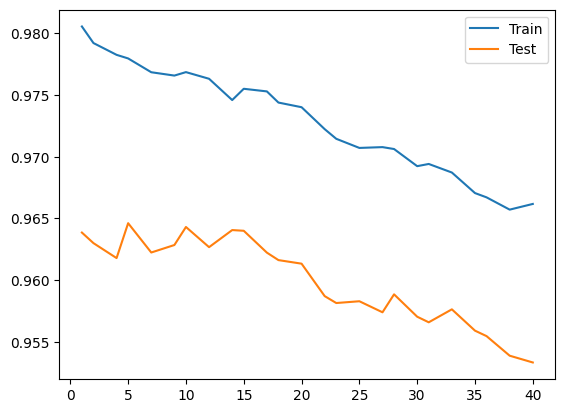

In [107]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=45,
                                             min_samples_leaf=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_samples_leaf: 5; train: 0.9779761017274062; test: 0.9646181563407067

In [108]:
model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=45,
                                             min_samples_leaf=5)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)

print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.9779761017274062
F2 Test RF Score : 0.9646181563407067


In [109]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.978
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      9254
           1       0.76      0.23      0.35       969

    accuracy                           0.92     10223
   macro avg       0.84      0.61      0.65     10223
weighted avg       0.91      0.92      0.90     10223

Confussion Matrix ------------------------------------
[[9183   71]
 [ 750  219]]


TESTING RESULT:
F2 Score: 0.965
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3932
           1       0.40      0.11      0.18       450

    accuracy                           0.89      4382
   macro avg       0.65      0.55      0.56      4382
weighted avg       0.85      0.89      0.86      4382

Confussion Matrix ------------------------------------
[[3855   77]
 [ 399   51]]


<AxesSubplot: >

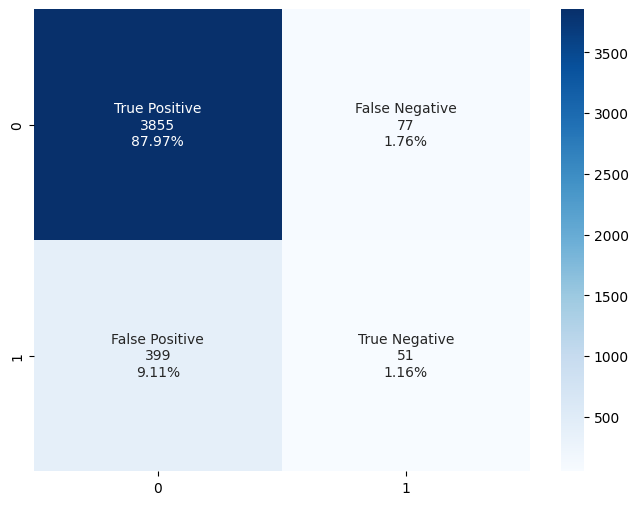

In [110]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

* Top drivers of client churn are antiquity of the client, tenure, and difference off peak - peak in energy price
* If the client have low years of antiquity, probability of client will be churn is high
* New clients have higher probability to churn rather than old clients, because old client seems to be more loyal with the company
* The larger difference between off peak - peak prices in energy, it means when off-peak way too expensive than peak, probabilty of clients will be churn is also high
* also price off peak power and price peak power have high contribution as predictor, generaly, higher prices drive clients to churn
* For price sensitivity features, generally seeing there're some features that contribute as important features. We can say that prices sensitivity also became main driver of clients churn

In [111]:
client_churn_proba = model_rf_tunned.predict_proba(X_test)[:,1]
client_churn_proba

array([0.12551129, 0.18115528, 0.17650306, ..., 0.13889217, 0.09092215,
       0.1243402 ])

In [112]:
client_churn_proba.tolist()

[0.12551128632329614,
 0.1811552818525864,
 0.17650306053316558,
 0.21157320419159797,
 0.22627991505668044,
 0.4077990278036329,
 0.14635171313422282,
 0.2604710208996223,
 0.13968102507283423,
 0.2135797935647821,
 0.22746703973536575,
 0.2833707798780252,
 0.17848731224875414,
 0.22073618492596844,
 0.11401715357105163,
 0.192099516895861,
 0.12074208557778343,
 0.0766208368567876,
 0.21065873390126433,
 0.35761117265597586,
 0.2525184855670801,
 0.16983080228039454,
 0.24538806058018392,
 0.21057955473379728,
 0.15212499315617994,
 0.06279243743208213,
 0.1658399490887756,
 0.27296698360256405,
 0.12231643306858714,
 0.16267131533625254,
 0.04980332175192272,
 0.18655099559729482,
 0.3030504438719354,
 0.10802756009826137,
 0.07905016153596355,
 0.13678812282661615,
 0.15594252792170551,
 0.27339612583561307,
 0.611940393028306,
 0.2608358052944552,
 0.13837080359404091,
 0.2527147710247274,
 0.30852165252627,
 0.23657794259005344,
 0.17595615198830386,
 0.10668546094402893,
 0.085

In [113]:
proba_predictions = model_rf_tunned.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [114]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [115]:
X_test['churn'] = y_pred_test_rf.tolist()
X_test['churn_probability'] = probabilities.tolist()
#X_test.to_csv('X_test_with_churn_proba.csv')

# Business impact of discount

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

Our task is to calculate the forecast revenue for the set of customers:

1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount

And hence to decide where the cut-off should be set in order to maximise revenue

## Calculate a baseline revenue estimate (no intervention)

Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast
price and actual churn outcome. Call this `basecase_revenue`.

- For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable `basecase_revenue_after_churn`, ie `basecase_revenue_after_churn` = `basecase_revenue`*(1 -0.919 * `churn`)

In [117]:
test_df = X_test.copy()

In [118]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [119]:
test_df.sample(4)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,off_mid_peak_avg_price_power_diff,Tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
2338,1548,0,0,233.29,0,0.0,18.51,0.147506,0.000000,46.305378,...,44.266930,5,49,10,49,1,0,0.280785,52.921675,52.921675
3575,68403,0,6809,6875.97,6809,0.0,131.75,0.112922,0.097810,40.606701,...,24.347731,12,133,10,133,1,0,0.126526,908.198284,908.198284
1900,46220,0,0,496.64,0,0.0,15.98,0.142649,0.000000,44.311378,...,44.266930,6,71,1,0,10,0,0.121394,86.825199,86.825199
2865,5881,0,0,556.68,0,0.0,118.95,0.114667,0.099548,40.939027,...,24.355876,4,38,10,2,1,0,0.358753,182.782826,182.782826


## Calculate the estimated benefits and costs of intervention
Now, pick a cut-off probability (eg 0.5) so that:

- Customers with a higher churn probability than the cut-off get a discount, and
- Customers below the churn-probability do not get a discount.

From this, calculate the revenue of the intervention scenario assuming:
- All customers who are offered a discount accept it
- Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8*`basecase_revenue` , being (1-`discount_fraction`)*`basecase_revenue`
- Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually
churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [120]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

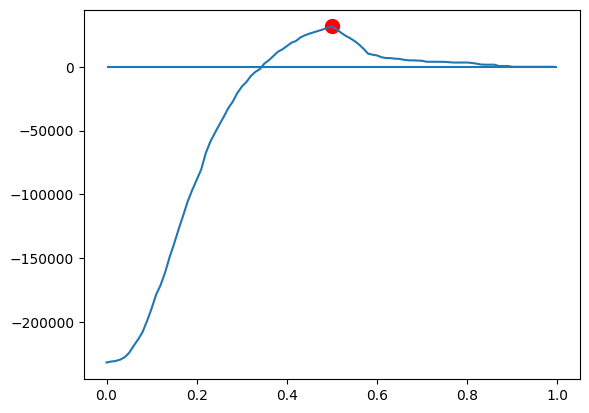

Maximum benefit at cutoff 0.5 with revenue delta of $31,629.67


In [121]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## How to Select Cut-Off?
Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

- For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
- Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [122]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

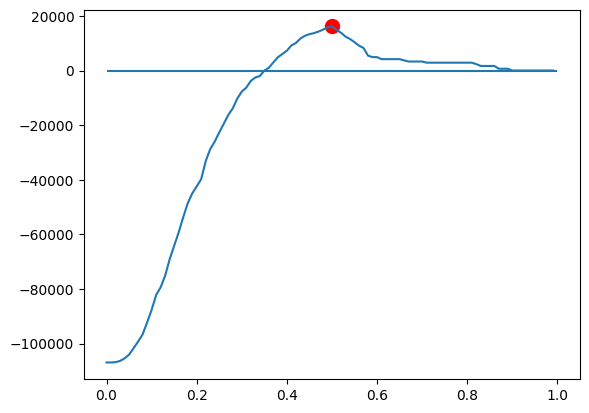

Maximum benefit at cutoff 0.5 with revenue delta of $16,136.34


In [123]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

<b>Note:</b> 

- In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn. 
- There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

## Using Forecast Rather Than Actual Churn

We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (`churn`) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

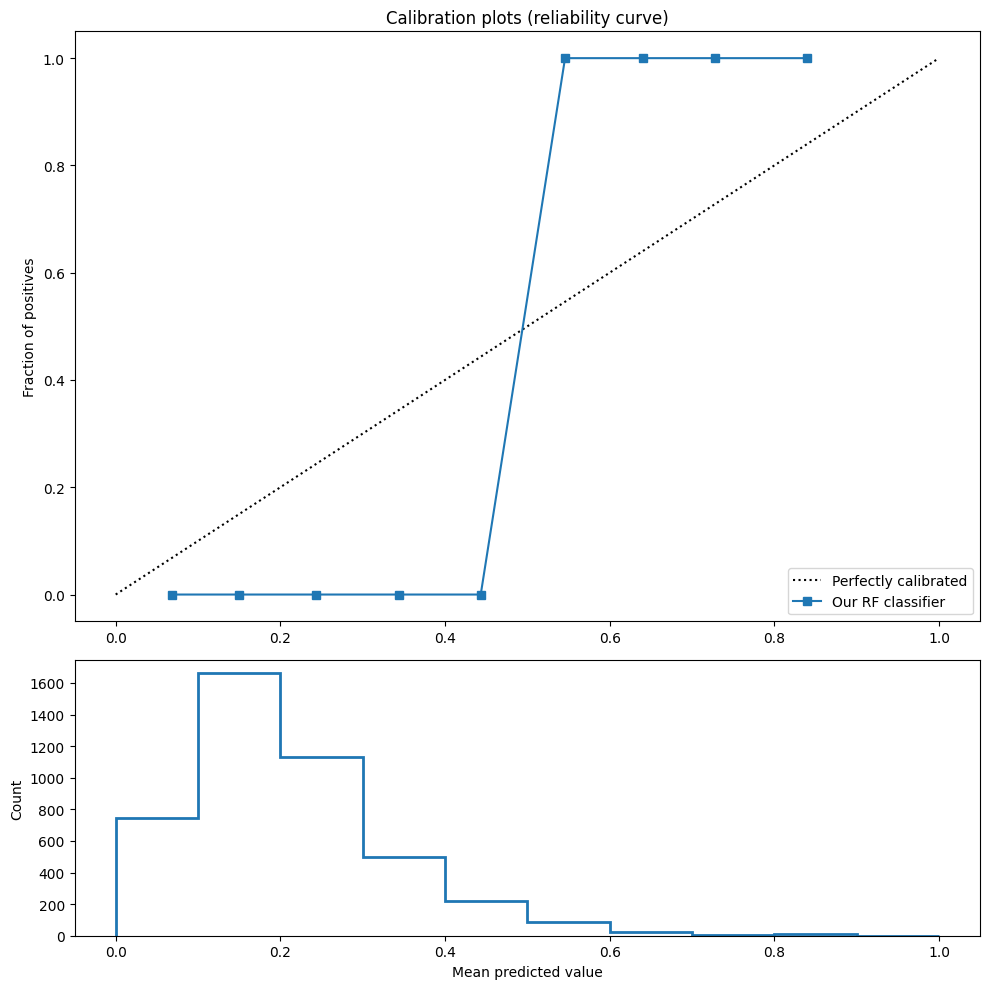

In [125]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

This chart tells us a few things:

- The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
- The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [126]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

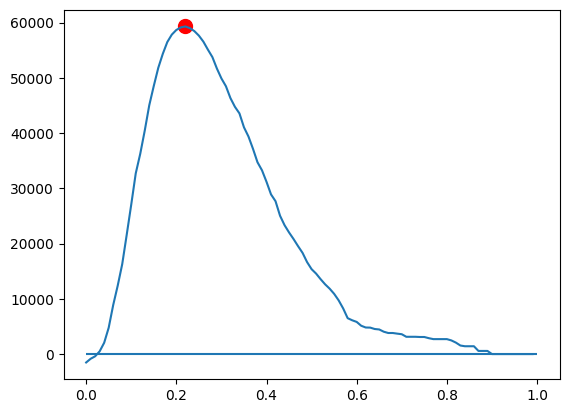

Maximum benefit at cutoff 0.22 with revenue delta of $59,303.44


In [127]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

## How to Select the Discount?
In the strategy suggested by the SME division head we offer a 20% discount to all customer targeted. However, this might not be optimal either. We assumed before that customers offered a discount will not churn. However, that may not be true in reality. The discount may not be large enough to prevent churn.

In fact, we can predict the churn probability for each customer as a function of price, margin and other factors. Therefore, we can try to find a strategy for each customer that optimises either their expected revenue or profit.

In order to go further, we'll need to try to:
- Change the level of discount offered overall
- Predict the response of customers to that discount (ie, the churn probability) based on how much that discount affects their prices, the revenue and margin.
    - Take care that we've applied the discount to all affected variables. To make this easier, we might want to retrain our model using a simpler set of variables where we know that we can factor the discount correctly into the predictors.
- Find the discount level that balances customer retention vs the cost of false positives.

In fact, this could be turned into a 2D optimisation problem:

- Objective: maximise net revenue (ie including the benefits of true positives and the cost of false positives)
- Decision variables:
    - Level of discount offered, and
    - Fraction of people who are offered a discount

An even more sophisticated strategy is to find the right level of discount for each customer that maximises their predicted revenue or margin.